<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Ecuaciones-Diferenciales-Parciales-2/blob/main/Metodo_Explicito_de_la_ecuacion_de_onda_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color = red>Método explícito de La ecuacion de la onda


##Use los tamaños de paso  $ h =0.1$ y $ k=0.05$ para aproximar la solucion de la ecuacion de calor

$$\frac{\partial^2 U}{\partial t^2}(x,t) = 4 \frac{\partial^2 U}{\partial x^2}(x,t), 0<x<1 y  0 \leq t $$

##con condiciones de frontera:

$$u(0,t) = u(1,t) = 0 , 0<t, $$

##y condiciones iniciales:

$$u(x,0) = sen(\pi x),  y  \frac{\partial U}{\partial t}(x,t)    0\leq x \leq 1. $$


##La ecuación en diferencias para el método implícito estándar es:

$$\frac{u_{i,j-1} - 2u_{i,j} + u_{i.j+1}}{k^2} = \alpha^2 \frac{u_{i-1,j} - 2u_{i,j} + u_{i+1,j}}{h^2}$$

##Reorganizando, se obtiene:

$$ u_{i,j+1} = ru_{i-1,j} + ru_{i+1,j} + (2 - 2r) u_{i,j} - u_{i,j-1} $$

##donde $r= \alpha^2 \frac{k^2}{h^2}$

In [105]:
import sympy as sp #SymPy es una librería para matemáticas simbólicas. Permite trabajar con variables algebraicas, ecuaciones, derivadas, integrales, etc.,
import numpy as np #NumPy es la librería fundamental para cálculo numérico en Python. Proporciona arrays multidimensionales, funciones matemáticas, operaciones de álgebra lineal, etc.

import matplotlib.pyplot as plt # Matplotlib es la librería estándar para crear visualizaciones en 2D y 3D.
                                # pyplot es un módulo que ofrece una interfaz similar a MATLAB para generar gráficos.
from mpl_toolkits.mplot3d import Axes3D # Habilita la creación de gráficos tridimensionales (ejes 3D) en Matplotlib.
from matplotlib import cm #cm (colormaps) proporciona mapas de colores para visualizar datos en 2D/3D
                          #Útil para asignar colores a superficies según valores numéricos.

In [106]:
def f(x): # es una declaración de función en Python
  return np.sin(np.pi*x)

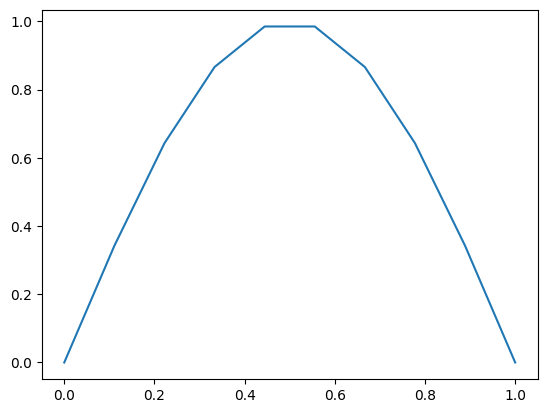

In [107]:
x = np.linspace(0,1,10)
plt.plot(x,f(x))

In [108]:
def tridiagonal(n, a, b):
  return sp.Matrix([
      [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
      for i in range(n)
  ])


In [109]:
r = 1

In [110]:
A = tridiagonal(9,2-2*r,r)

In [111]:
A

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [112]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])

In [113]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [114]:
def ecua_onda(A, B, b, j):
    b_1 = B*b    # mismo paso inicial de tu función
    S = []       # aquí guardaremos cada solución

    for i in range(j):
        sol = A.LUsolve(b_1)    # u^{n+1}
        S.append(sol.T)         # guardar fila (como vector renglón)
        b_1 = B*sol             # preparar siguiente paso

    # Convertir lista de vectores sympy a una matriz sympy
    return sp.Matrix(S)

In [115]:
j = 50

In [116]:
U = ecua_onda(A, B, b, j)

NonInvertibleMatrixError: Matrix det == 0; not invertible.